# Oleobrás

You work for the mining company Oleobrás. Your task is to find the best place for a new well.

*Steps to choose the location:*

* Collect the parameters of oil wells in the selected region: the quality of the oil and the volume of reserves;
* Build a model to predict the volume of reserves in the new wells;
* Choose the oil wells with the highest estimated values;
* Choose the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. The parameters of each oil well in the region are already known. Build a model that will help you choose the region with the highest profit margin. Use the Bootstrapping technique to analyze potential profit and risks

**Conditions**
* Only linear regression can be used to train the model (the rest are not predictive enough).
* When exploring the region, a study of 500 points is carried out and the best 200 points are selected to calculate the profit.
* The budget for developing 200 oil wells is 100 million dollars.
* A barrel of crude oil brings in 4.5 dollars in revenue. The revenue from one unit of product is 4,500 dollars (the volume of reserves is in thousands of barrels).
* Once you have assessed the risks, keep only those regions with a risk of loss of less than 2.5%. Among those that fit the criteria, you need to select the region with the highest average profit.

The data is synthetic and does not include any details of contracts or well characteristics.

## Libraries & Visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [4]:
df0 = pd.read_csv("C:\\Users\\Guilherme\\Downloads\\geo_data_0 (1).csv")
df1 = pd.read_csv("C:\\Users\\Guilherme\\Downloads\\geo_data_1.csv")
df2 = pd.read_csv("C:\\Users\\Guilherme\\Downloads\\geo_data_2.csv")
display(df0,df1,df2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [5]:
print(df0.info())
print(df1.info())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [6]:
def linhas_duplicadas(dataframe):
    linhas_duplicadas = dataframe.duplicated()
    return dataframe[linhas_duplicadas]


In [7]:
linhas_duplicadas(df0)

,id,f0,f1,f2,product


In [8]:
linhas_duplicadas(df1)

,id,f0,f1,f2,product


In [9]:
linhas_duplicadas(df2)

,id,f0,f1,f2,product


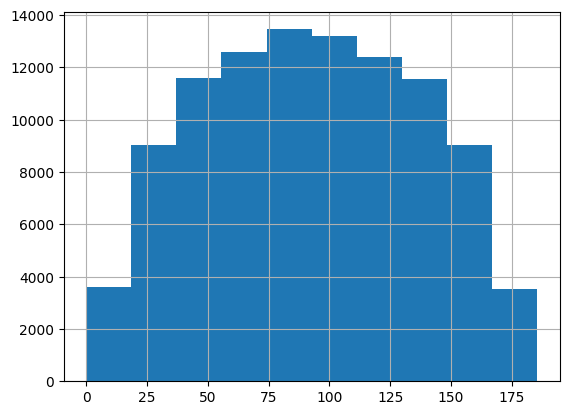

In [10]:
df0['product'].hist();

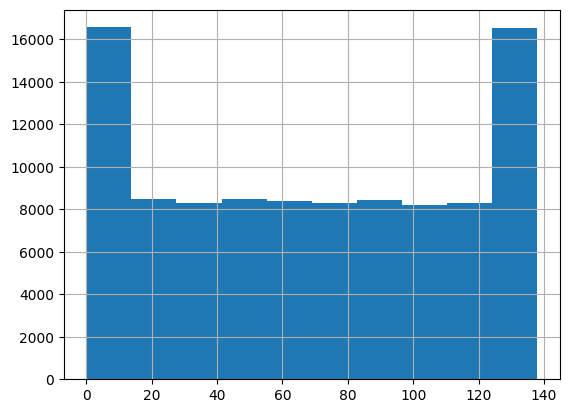

In [11]:
df1['product'].hist();

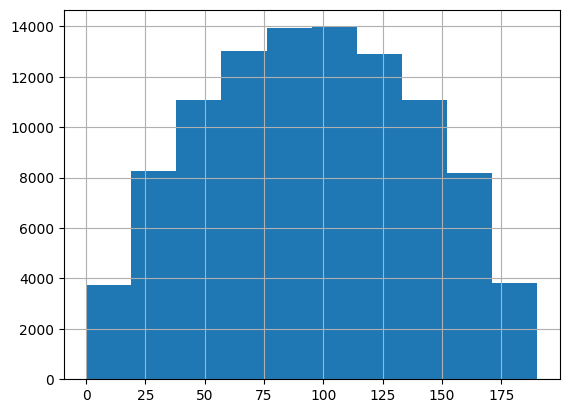

In [12]:
df2['product'].hist();

* No adjustments should be made
* A different structure is observed in the second region

## Data Breakdown

* No need for OHE and data scaling

### First Region (df0)

In [13]:
features0 = df0.drop(['id','product'], axis=1)
target0= df0['product']

In [14]:
df_train_0, df_valid_0 = train_test_split(df0, test_size=0.25, random_state=12345)


In [15]:
features_train_0 = df_train_0.drop(['id','product'], axis=1)
target_train_0 = df_train_0['product']

features_valid_0 = df_valid_0.drop(['id','product'], axis=1)
target_valid_0 = df_valid_0['product']


print(features_train_0.shape)
print(target_train_0.shape)
print(features_valid_0.shape)
print(target_valid_0.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


### Second Region (df1)

In [16]:
features1 = df1.drop(['id','product'], axis=1)
target1= df1['product']

In [17]:
df_train_1, df_valid_1 = train_test_split(df1, test_size=0.25, random_state=12345)

In [18]:
features_train_1 = df_train_1.drop(['id','product'], axis=1)
target_train_1 = df_train_1['product']

features_valid_1 = df_valid_1.drop(['id','product'], axis=1)
target_valid_1 = df_valid_1['product']


print(features_train_1.shape)
print(target_train_1.shape)
print(features_valid_1.shape)
print(target_valid_1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


### Third Region (df2)

In [19]:
features2 = df2.drop(['id','product'], axis=1)
target2= df2['product']

In [20]:
df_train_2, df_valid_2 = train_test_split(df2, test_size=0.25, random_state=12345)

In [21]:
features_train_2 = df_train_2.drop(['id','product'], axis=1)
target_train_2 = df_train_2['product']

features_valid_2 = df_valid_2.drop(['id','product'], axis=1)
target_valid_2 = df_valid_2['product']


print(features_train_2.shape)
print(target_train_2.shape)
print(features_valid_2.shape)
print(target_valid_2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


## Training & Testing

### First Region (df0)

In [22]:
model = LinearRegression()

model.fit(features_train_0,target_train_0) 
predictions_valid = model.predict(features_valid_0)



result = mean_squared_error(target_valid_0, predictions_valid)**0.5


print("The RMSE of the linear regression model in the validation set:", result)


The RMSE of the linear regression model in the validation set: 37.5794217150813


In [25]:
df00 = pd.DataFrame({'Predictions': predictions_valid, 'Correct Answers': target_valid_0})
df00

,Predictions,Correct Answers
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180
...,...,...
12581,103.037104,170.116726
18456,85.403255,93.632175
73035,61.509833,127.352259
63834,118.180397,99.782700


In [26]:
print("Predicted average volume of reserves:", predictions_valid.mean())

Predicted average volume of reserves: 92.59256778438035


### Second Region (df1)


In [27]:
model = LinearRegression()

model.fit(features_train_1,target_train_1) 
predictions_valid1 = model.predict(features_valid_1)



result = mean_squared_error(target_valid_1, predictions_valid1)**0.5


print("The RMSE of the linear regression model in the validation set:", result)


The RMSE of the linear regression model in the validation set: 0.8930992867756165


In [28]:
df11 = pd.DataFrame({'Predictions': predictions_valid1, 'Correct Answers': target_valid_1})
df11

,Predictions,Correct Answers
71751,82.663314,80.859783
80493,54.431786,53.906522
2655,29.748760,30.132364
53233,53.552133,53.906522
91141,1.243856,0.000000
...,...,...
12581,136.869211,137.945408
18456,110.693465,110.992147
73035,137.879341,137.945408
63834,83.761966,84.038886


In [29]:
print("Predicted average volume of reserves:", predictions_valid1.mean())

Predicted average volume of reserves: 68.728546895446


### Third Region (df2)

In [30]:
model = LinearRegression()

model.fit(features_train_2,target_train_2) 
predictions_valid2 = model.predict(features_valid_2)



result = mean_squared_error(target_valid_2, predictions_valid2)**0.5


print("The RMSE of the linear regression model in the validation set:", result)


The RMSE of the linear regression model in the validation set: 40.02970873393434


In [31]:
df22 = pd.DataFrame({'Predictions': predictions_valid2, 'Correct Answers': target_valid_2})
df22

,Predictions,Correct Answers
71751,93.599633,61.212375
80493,75.105159,41.850118
2655,90.066809,57.776581
53233,105.162375,100.053761
91141,115.303310,109.897122
...,...,...
12581,78.765887,28.492402
18456,95.603394,21.431303
73035,99.407281,125.487229
63834,77.779912,99.422903


In [32]:
print("Predicted average volume of reserves:", predictions_valid2.mean())

Predicted average volume of reserves: 94.96504596800489


### Conclusion

* The Third Region had the worst results, although it had the highest average predicted volume of 94.96504596800489, this was at the cost of an RMSE of 40.02970873393434. The First Region, on the other hand, had an average forecast volume of 92,59256778438035, with a RMSE of 37,5794217150813, performing better than the Third Region, but still with less accurate forecasts. The average predicted volume is high, but how accurate is it? The Second Region had the best RMSE of 0.893099286775617, with very good predictions, but resulted in a sharp drop in the average predicted volume with a value of 68.728546895446, but more accurate.

## Pre-profit calculation
* Store all the values needed for the calculations in separate variables.
* Calculate the volume of reserves sufficient to develop a new well without losses. Compare the value received with the average value of reserves in each region.
* Provide conclusions on the preparation for the profit calculation stage.

**Conditions**
* When exploring the region, a study of 500 points is carried out and the best 200 points are selected to calculate the profit.
* The budget for developing 200 oil wells is 100 million dollars.
* A barrel of crude oil brings in 4.5 dollars in revenue. The revenue from one unit of product is 4,500 dollars (the volume of reserves is in thousands of barrels).

In [33]:
otp = 100000000
cpp=4.5
ruv=4500
vsp=otp/ruv
print('Sum of the volume needed to avoid losses (200 wells):',vsp)
rpu=otp/200
vpp=rpu/ruv #I used the ruv variable to leave it in the same unit as the dataframe, as I believe I could use the cpp variable as well
print('Volume required for each well to be profitable:', vpp)


Sum of the volume needed to avoid losses (200 wells): 22222.222222222223
Volume required for each well to be profitable: 111.11111111111111


### First Region (df0)

In [34]:
df0500a = df0.sample(n=500,random_state=12345)
df0200a = df0500a.sort_values(by='product', ascending = False).head(200)
soma_df0200a = df0200a['product'].sum()
print('Sum of the best 200 from a set of 500 random originals:', soma_df0200a)

Sum of the best 200 from a set of 500 random originals: 26752.00718761


In [35]:
df0200m = df0.sort_values(by='product', ascending = False).head(200)
soma_df0200m = df0200m['product'].sum()
print('Sum of the best 200 originals:', soma_df0200m)


Sum of the best 200 originals: 36966.747929072015


In [36]:
print('Average of the original set:',df0['product'].mean())
print('Average of the best 200 from a set of 500 original random ones:',df0200a['product'].mean())
print('Average of the best 200 originals:',df0200m['product'].mean())

Average of the original set: 92.50000000000001
Average of the best 200 from a set of 500 original random ones: 133.76003593805
Average of the best 200 originals: 184.83373964536008


In [41]:
df0500ap = df00.sample(n=500,random_state=12345)
df0200ap = df0500ap.sort_values(by='Predictions', ascending = False).head(200)
soma_df0200ap = df0200ap['Predictions'].sum()
print('Sum of the best 200 from a set of 500 random predictions:', soma_df0200ap)

Sum of the best 200 from a set of 500 random predictions: 23345.215322290172


In [42]:
df0200mp = df00.sort_values(by='Predictions', ascending = False).head(200)
soma_df0200mp = df0200mp['Predictions'].sum()
print('Sum of the best 200 predicted:', soma_df0200mp)

Sum of the best 200 predicted: 31102.330838811387


In [43]:
print('Average of the predicted set:',df00['Predictions'].mean())
print('Average of the best 200 from a set of 500 random predictions:',df0200ap['Predictions'].mean())
print('Average of the best 200 predicted:',df0200mp['Predictions'].mean())

Average of the predicted set: 92.59256778438035
Average of the best 200 from a set of 500 random predictions: 116.72607661145086
Average of the best 200 predicted: 155.51165419405694


### Second Region (df1)

In [44]:
df1500a = df1.sample(n=500,random_state=12345)
df1200a = df1500a.sort_values(by='product', ascending = False).head(200)
soma_df1200a = df1200a['product'].sum()
print('Sum of the best 200 from a set of 500 random originals:', soma_df1200a)

Sum of the best 200 from a set of 500 random originals: 22925.47628046755


In [45]:
df1200m = df1.sort_values(by='product', ascending = False).head(200)
soma_df1200m = df1200m['product'].sum()
print('Sum of the best 200 originals:', soma_df1200m)

Sum of the best 200 originals: 27589.081548181137


In [46]:
print('Average of the original set:',df1['product'].mean())
print('Average of the best 200 from a set of 500 original random ones:',df1200a['product'].mean())
print('Average of the best 200 originals:',df1200m['product'].mean())

Average of the original set: 68.82500000000002
Average of the best 200 from a set of 500 original random ones: 114.62738140233775
Average of the best 200 originals: 137.9454077409057


In [47]:
df1500ap = df11.sample(n=500,random_state=12345)
df1200ap = df1500ap.sort_values(by='Predictions', ascending = False).head(200)
soma_df1200ap = df1200ap['Predictions'].sum()
print('Sum of the best 200 from a set of 500 random predictions:', soma_df1200ap)

Sum of the best 200 from a set of 500 random predictions: 23953.82043647271


In [48]:
df1200mp = df11.sort_values(by='Predictions', ascending = False).head(200)
soma_df1200mp = df1200mp['Predictions'].sum()
print('Sum of the best 200 predicted:', soma_df1200mp)

Sum of the best 200 predicted: 27746.02678216347


In [49]:
print('Average of the predicted set:',df11['Predictions'].mean())
print('Average of the best 200 from a set of 500 random predictions:',df1200ap['Predictions'].mean())
print('Average of the best 200 predicted:',df1200mp['Predictions'].mean())

Average of the predicted set: 68.728546895446
Average of the best 200 from a set of 500 random predictions: 119.76910218236355
Average of the best 200 predicted: 138.73013391081736


### Third Region (df2)

In [50]:
df2500a = df2.sample(n=500,random_state=12345)
df2200a = df2500a.sort_values(by='product', ascending = False).head(200)
soma_df2200a = df2200a['product'].sum()
print('Sum of the best 200 from a set of 500 random originals:', soma_df2200a)

Sum of the best 200 from a set of 500 random originals: 27624.85559975184


In [51]:
df2200m = df2.sort_values(by='product', ascending = False).head(200)
soma_df2200m = df2200m['product'].sum()
print('Sum of the best 200 originals:', soma_df2200m)

Sum of the best 200 originals: 37910.29539635329


In [52]:
print('Average of the original set:',df2['product'].mean())
print('Average of the best 200 from a set of 500 original random ones:',df2200a['product'].mean())
print('Average of the best 200 originals:',df2200m['product'].mean())

Average of the original set: 95.00000000000004
Average of the best 200 from a set of 500 original random ones: 138.1242779987592
Average of the best 200 originals: 189.55147698176646


In [53]:
df2500ap = df22.sample(n=500,random_state=12345)
df2200ap = df2500ap.sort_values(by='Predictions', ascending = False).head(200)
soma_df2200ap = df2200ap['Predictions'].sum()
print('Sum of the best 200 from a set of 500 random predictions:', soma_df2200ap)

Sum of the best 200 from a set of 500 random predictions: 22978.221506140977


In [54]:
df2200mp = df22.sort_values(by='Predictions', ascending = False).head(200)
soma_df2200mp = df2200mp['Predictions'].sum()
print('Sum of the best 200 predicted:', soma_df2200mp)

Sum of the best 200 predicted: 29603.898658318358


In [55]:
print('Average of the predicted set:',df22['Predictions'].mean())
print('Average of the best 200 from a set of 500 random predictions:',df2200ap['Predictions'].mean())
print('Average of the best 200 predicted:',df2200mp['Predictions'].mean())

Average of the predicted set: 94.96504596800489
Average of the best 200 from a set of 500 random predictions: 114.89110753070489
Average of the best 200 predicted: 148.0194932915918


### Conclusion

* All of them made a profit as they were above the minimum value of 22222. However, when comparing the value of each well and their predicted averages calculated previously, none made a profit. The Third Region was the closest to the value of 111 with an average of 94. In conclusion, in order to make a profit, 200 wells will have to be installed, as just one may be too risky. 

* Region One: The best 200 had higher values than the random best 200, which was to be expected, but the original best 200 had a higher sum than the predicted best 200, which means that the model is usually getting its prediction wrong. 
* Second region: The same happens with the best 200 and the best 200 random. We see a change in behavior when comparing the original and predicted values, with the original best 200 having a lower sum than the predicted best 200, which means that the model is usually getting its prediction wrong. 
* Third Region: Same behavior as the first region, the best 200 had higher values than the random best 200 and the original best 200 had a higher sum than the predicted best 200.

* Proximity of Values: The region that had the closest predicted values to the originals was the Second Region, since it has the lowest RMSE, and this order follows the same RMSE values from lowest to highest. In terms of the highest predictions, the Third Region had the best figures (since its RMSE is the highest), but at the cost of lower accuracy.

* Averages: The averages between the original and predicted sets compared within their own region are very close. The averages compared to each other in the random sets of their respective region are not close, concluding that even if we take a set of 500 random sets, whether predicted or not, and choose the best 200, there will be an increase in the average.

## Profit Calculation Function

* Write a function to calculate profit for a set of selected oil wells and model predictions:
* Choose the wells with the highest prediction values.
* Summarize the target volume of reserves according to these predictions.
* Present your conclusions: suggest a region for oil well development and justify your choice. Calculate the profit for the volume of reserves received.

**Conditions**
* When exploring the region, a study of 500 points is carried out and the best 200 points are selected to calculate the profit.
* The budget for developing 200 oil wells is 100 million dollars.
* A barrel of crude oil brings in 4.5 dollars in revenue. The revenue from one unit of product is 4,500 dollars (the volume of reserves is in thousands of barrels).

In [56]:
def lucro(dataframe1, coluna1):
    x = (dataframe1[coluna1]*4500)
    x.hist()
    y = (x.sum()) - 100000000
        
    return y

### First Region (df0)

In [57]:
df00200=df00.sort_values(by='Predictions', ascending = False).head(200)

First Region profit: 39960488.77465126


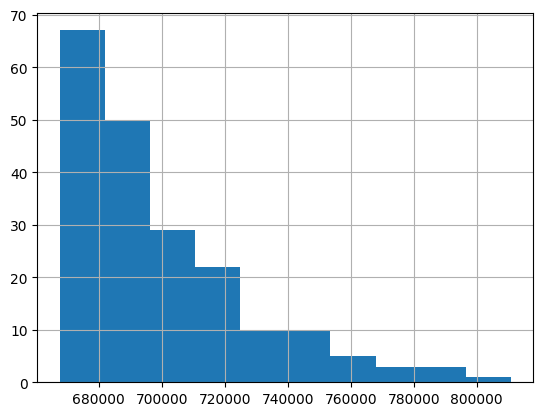

In [58]:
lucro0o = lucro(df00200,'Predictions')
print('First Region profit:',lucro0o)

### Second Region (df1)

In [60]:
df11200=df11.sort_values(by='Predictions', ascending = False).head(200)

Second Region profit: 24857120.519735605


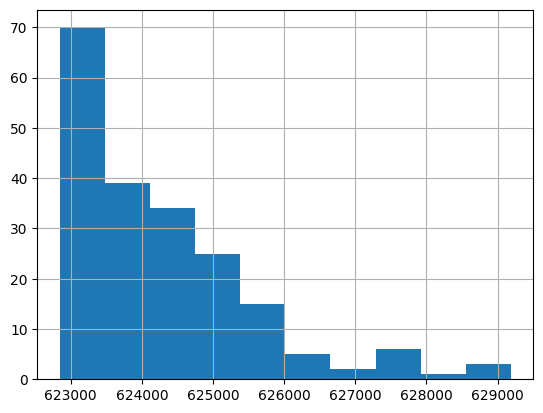

In [61]:
lucro1o = lucro(df11200, 'Predictions')
print('Second Region profit:',lucro1o)

### Third Region (df2)

In [62]:
df22200=df22.sort_values(by='Predictions', ascending = False).head(200)

Third Region profit: 33217543.962432608


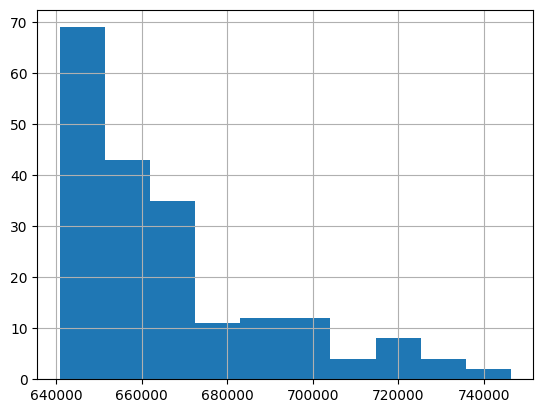

In [63]:
lucro2o = lucro(df22200, 'Predictions')
print('Third Region profit:',lucro2o)

### Conclusion

* The First Region obtained the best result out of the top 200 wells predicted. Close behind is the Third Region, which I believe is due to the fact that the first graph has a similar shape between these two regions.

## Risks and Profits

Calculate risks and profits for each region:
* Use the bootstrapping technique with 1000 samples to find the profit distribution.
* Find the average profit, 95% confidence interval and risk of loss. Loss is a negative profit, calculate it as a probability and then express it as a percentage.
* Present your conclusions: suggest a region for the development of oil wells and justify your choice.

In [64]:
def boot(data):
    n_bootstrap = 1000

    bootstrap_lucros = []

    for i in range(n_bootstrap):
        bootstrap_sample = data.sample(500, replace=True)
        bootstrap_lucros.append(
            (
                bootstrap_sample
                .sort_values("Predictions", ascending=False)
                .head(200)['Correct Answers']
                .sum()
            ) * ruv - otp
        )

    bootstrap_lucros = np.array(bootstrap_lucros)

    media_lucro = bootstrap_lucros.mean()
    lower_bound = np.percentile(bootstrap_lucros, 2.5)
    upper_bound = np.percentile(bootstrap_lucros, 97.5)

    prejuizo_probabilidade = np.mean(bootstrap_lucros < 0)
    prejuizo_porcentagem = prejuizo_probabilidade * 100

    print("Average profit:", media_lucro)
    print("95% confidence interval:", lower_bound, "-", upper_bound)
    print("Risk of loss:", prejuizo_porcentagem, "%")

### First Region (df0)

In [65]:
boot(df00)

Average profit: 3851704.448998626
95% confidence interval: -1486067.8759845616 - 9118384.152147707
Risk of loss: 7.5 %


### Second Region (df1)

In [66]:
boot(df11)

Average profit: 4588738.297986431
95% confidence interval: 273595.01730556384 - 8787414.879087778
Risk of loss: 1.6 %


### Third Region (df2)

In [67]:
boot(df22)

Average profit: 3856015.0334548727
95% confidence interval: -1404810.8791180924 - 9219511.778307928
Risk of loss: 7.5 %


### Conclusion

* The second region obtained the best results in terms of average profit, confidence interval and risk of loss.

## General conclusion

* The Third Region behaved very similarly to the First. Compared to the Second Region, the Second Region obtained better results in the most important tests, such as the bootstrapping technique, because I believe that when choosing a region, you should consider the whole region and not just the best results. The Second Region's behavior is different from the others because its 'population' is arranged differently in the graphs. I believe that this made the Second Region do better in the bootstrap and consequently be the region chosen because it has more average profit, a better confinement interval and, above all, the lowest percentage of loss.

**The region chosen was the Second**